In [1]:
csv_path="C:/Users/OJASV/Desktop/DS_Practice/ANN-ML/Data/Housing.csv"
print(csv_path)

C:/Users/OJASV/Desktop/DS_Practice/ANN-ML/Data/Housing.csv


In [2]:
import pandas as pd

df=pd.read_csv(csv_path)
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [3]:
df=pd.get_dummies(df)

y=df["price"]
X=df.drop(["price"],axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
from sklearn.preprocessing import  StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict 
y_pred = model.predict(X_test_scaled)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 961213.1504944776
R2: 0.6427838635222574


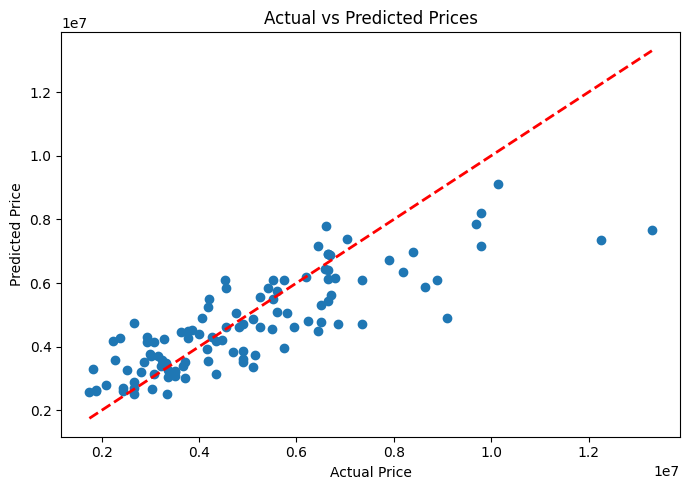

In [12]:
import matplotlib.pyplot as plt

# Actual vs Predicted scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.tight_layout()
plt.show()